<a href="https://colab.research.google.com/github/rahuldas75/Files/blob/main/Final_AIML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Build and Train a Decision Tree Model

##### Import Libraries

In [210]:
# Step 1: Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


##### Load CSV file and create a Pandas Dataframe: data

In [211]:
# Step 2: Load the Dataset
url = 'https://raw.githubusercontent.com/rahuldas75/Files/refs/heads/main/synthetic_drug_data_1000.csv'
data = pd.read_csv(url)

#####Data Preprocessing

In [212]:
# Step 3: Data Preprocessing
# Inspect the data
print(data.head())
print(data.info())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   59   M     LOW        HIGH   22.922  drugY
1   62   F    HIGH      NORMAL   38.555  drugY
2   68   F     LOW        HIGH   13.522  drugX
3   15   M    HIGH      NORMAL   20.861  drugA
4   18   M  NORMAL        HIGH   20.239  drugY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1000 non-null   int64  
 1   Sex          1000 non-null   object 
 2   BP           1000 non-null   object 
 3   Cholesterol  1000 non-null   object 
 4   Na_to_K      1000 non-null   float64
 5   Drug         1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB
None


In [213]:
# Handling missing values if any
data = data.dropna()  # or use data.fillna(method='ffill')
categorical_cols = data.select_dtypes(include=['object']).columns

##### Label Encode the Nominal attributes of the pandas DataFrame: data

In [214]:
#Label Encoder
Sex = LabelEncoder()
BP = LabelEncoder()
Cholesterol = LabelEncoder()
Drug = LabelEncoder()

In [215]:
data['Sex'] = Sex.fit_transform(data['Sex'])
data['BP'] = BP.fit_transform(data['BP'])
data['Cholesterol'] = Cholesterol.fit_transform(data['Cholesterol'])
data['Drug'] = Drug.fit_transform(data['Drug'])

In [216]:
#Display Label Encoded DataSet
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,59,1,1,0,22.922,4
1,62,0,0,1,38.555,4
2,68,0,1,0,13.522,3
3,15,1,0,1,20.861,0
4,18,1,2,0,20.239,4
...,...,...,...,...,...,...
995,26,1,0,1,20.516,0
996,65,0,2,1,31.312,3
997,36,0,1,1,11.701,2
998,65,0,2,1,36.086,3


##### Create training vector set 'X' and label variable 'y'

In [217]:
features_cols=['Sex','BP','Cholesterol']
X=data[features_cols]
y=data.Drug

In [218]:
X

,Sex,BP,Cholesterol
0,1,1,0
1,0,0,1
2,0,1,0
3,1,0,1
4,1,2,0
...,...,...,...
995,1,0,1
996,0,2,1
997,0,1,1
998,0,2,1


In [219]:
y

,Drug
0,4
1,4
2,3
3,0
4,4
...,...
995,0
996,3
997,2
998,3


##### Split the whole dataset into training set and test set with 80:20 ratio

In [220]:
# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#####Train the Decision Tree Model

In [221]:
# Step 5: Train the Decision Tree Model
# Create Decision Tree classifer object
classifier=DecisionTreeClassifier(criterion='gini') #Use Gini Index as Attribute Selection Measure


In [231]:
classifier=DecisionTreeClassifier(criterion='entropy') #Use Information gain(i.e. entropy) as Attribute Selection Measure

######Fit training/testing data into the Decision Tree Classifier(Model)

In [232]:
# Train Decision Tree Classifer
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

######Predict the response for test dataset

In [233]:

y_pred = classifier.predict(X_test)
print(y_pred)
print("",X_test)

[1 2 4 4 3 1 2 1 2 0 0 2 0 4 0 3 4 3 3 4 0 3 0 4 1 1 3 1 4 1 3 3 3 0 3 0 2
 1 1 4 3 1 1 0 4 3 0 0 3 1 0 4 3 0 3 3 4 1 4 0 4 3 1 3 3 3 3 3 3 1 1 0 2 0
 3 3 0 0 0 2 3 4 1 0 4 2 3 2 1 3 4 3 0 1 4 3 4 0 0 0 1 0 2 1 1 4 0 1 0 3 4
 0 1 4 0 4 0 0 0 1 2 1 1 3 0 3 1 3 0 0 3 2 4 4 4 1 0 1 3 0 1 4 0 0 0 3 1 0
 1 0 3 4 0 0 4 3 2 1 0 1 0 0 3 1 3 0 4 0 4 0 3 0 0 3 0 3 3 4 3 1 0 4 2 1 0
 3 3 0 0 3 1 4 1 4 1 3 1 0 0 4]
      Sex  BP  Cholesterol
521    1   1            1
737    0   0            1
740    1   1            0
660    1   1            0
411    0   2            1
..   ...  ..          ...
408    1   2            0
332    1   1            1
208    1   2            1
613    1   2            1
78     1   1            0

[200 rows x 3 columns]


In [234]:
print('Actual Labels of the Testing Data')
y_test

Actual Labels of the Testing Data


,Drug
521,1
737,2
740,4
660,3
411,1
...,...
408,3
332,4
208,3
613,4


##### Model Accuracy

In [235]:

print("Model Accuracy:")
print(classifier.score(X_test, y_test))

Model Accuracy:
0.17


#####Visualize the Tree

[Text(0.5, 0.9, 'x[0] <= 0.5\nentropy = 2.32\nsamples = 800\nvalue = [164, 157, 166, 147, 166]'),
 Text(0.20454545454545456, 0.7, 'x[1] <= 0.5\nentropy = 2.314\nsamples = 395\nvalue = [83, 84, 89, 72, 67]'),
 Text(0.3522727272727273, 0.8, 'True  '),
 Text(0.09090909090909091, 0.5, 'x[2] <= 0.5\nentropy = 2.302\nsamples = 138\nvalue = [28, 25, 35, 21, 29]'),
 Text(0.045454545454545456, 0.3, 'entropy = 2.276\nsamples = 69\nvalue = [19, 10, 14, 10, 16]'),
 Text(0.13636363636363635, 0.3, 'entropy = 2.26\nsamples = 69\nvalue = [9.0, 15.0, 21.0, 11.0, 13.0]'),
 Text(0.3181818181818182, 0.5, 'x[1] <= 1.5\nentropy = 2.307\nsamples = 257\nvalue = [55, 59, 54, 51, 38]'),
 Text(0.22727272727272727, 0.3, 'x[2] <= 0.5\nentropy = 2.294\nsamples = 127\nvalue = [24, 29, 31, 26, 17]'),
 Text(0.18181818181818182, 0.1, 'entropy = 2.278\nsamples = 70\nvalue = [10, 15, 17, 18, 10]'),
 Text(0.2727272727272727, 0.1, 'entropy = 2.262\nsamples = 57\nvalue = [14, 14, 14, 8, 7]'),
 Text(0.4090909090909091, 0.3, 

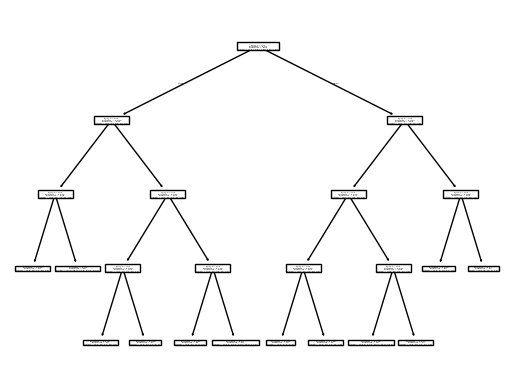

In [236]:
tree.plot_tree(classifier)

#####Evaluate your model on various matrices

In [237]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.17
Precision: 0.16257417271993538
Recall: 0.17
F1-score: 0.16065016655667277


In [238]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  9  4 12  7]
 [11  4  3 13 13]
 [13 12  2  6  5]
 [12 10  2 13  5]
 [13  7  3  6  5]]


#####**Example prediction**

In [239]:
new_data = [[1, 0, 2]]  # Example: Sex=Male (1), BP=LOW (0), Cholesterol=HIGH (2)
new_data_df = pd.DataFrame(new_data, columns=['Sex', 'BP', 'Cholesterol'])

In [240]:
# Make prediction on new data
prediction = classifier.predict(new_data_df)
print("Prediction for new data:", prediction)

Prediction for new data: [4]
